# Summary

This notebook compares the results of all implemented methods which have dumped the scores under the results repository.

The scores are sorted from the best to the worst performing method.

In [1]:
import sys
sys.path.append('../src')
import data_utils
import glob
import os
import pandas as pd

Put together all experimental results in results_df dataframe.

In [2]:
results_folder = 'results/*'
results_df = pd.DataFrame() # create an empty dataframe to store the results of all experiments

# load the results of all experiments saved in the results folder
file_paths = glob.glob(results_folder)
for file_path in file_paths:
    # extract the method name from the file path
    file_name = os.path.basename(file_path)
    method_name = os.path.splitext(file_name)[0]
    scores = data_utils.load_results(file_path)
    # add the method name to the dictionary
    scores["method"] = method_name

    
    # add one row to the dataframe which is a dictionary where the keys are the column names
    results_df = pd.concat([results_df, pd.DataFrame([scores])], ignore_index=True)

In [3]:
# Set the method column as the index of the dataframe to make it easier to access the results of a specific method
results_df.set_index("method", inplace=True)

In [4]:
# Convert scores to numeric values
results_df = results_df.map(pd.to_numeric, errors='coerce')

In [5]:
results_df.round(3).sort_values(by="F1", ascending=False)

,AUCROC,AUCPR,F1,Precision,Recall,Adjusted AUCROC,Adjusted AUCPR,Adjusted F1,Adjusted Precision,Adjusted Recall
method,,,,,,,,,,
deepod TranAD,0.953,0.659,0.679,0.628,0.739,1.000,1.000,1.000,1.000,1.0
pyod ECOD,0.935,0.567,0.610,0.475,0.852,1.000,1.000,1.000,1.000,1.0
darts NBEATSModel aucp thresholding,0.188,0.289,0.485,0.320,1.000,0.626,0.386,0.557,0.386,1.0
darts NBEATSModel filter thresholding,0.429,0.320,0.485,0.320,1.000,0.429,0.320,0.485,0.320,1.0
sklearn Isolation Forest,0.718,0.284,0.485,0.475,0.494,0.971,0.647,0.786,0.647,1.0
deepod TimesNet,0.777,0.390,0.420,0.403,0.438,1.000,1.000,1.000,1.000,1.0
sklearn One-Class SVM,0.667,0.211,0.392,0.382,0.403,0.965,0.605,0.754,0.605,1.0
pysad LODA xStream,0.602,0.213,0.271,0.218,0.358,0.999,0.994,0.997,0.994,1.0
pycaret Connectivity-Based Local Outlier,0.564,0.120,0.212,0.208,0.216,0.956,0.548,0.708,0.548,1.0


In [6]:
results_df.round(3).sort_values(by="Adjusted F1", ascending=False)

,AUCROC,AUCPR,F1,Precision,Recall,Adjusted AUCROC,Adjusted AUCPR,Adjusted F1,Adjusted Precision,Adjusted Recall
method,,,,,,,,,,
deepod TimesNet,0.777,0.390,0.420,0.403,0.438,1.000,1.000,1.000,1.000,1.0
deepod TranAD,0.953,0.659,0.679,0.628,0.739,1.000,1.000,1.000,1.000,1.0
pyod ECOD,0.935,0.567,0.610,0.475,0.852,1.000,1.000,1.000,1.000,1.0
pysad LODA xStream,0.602,0.213,0.271,0.218,0.358,0.999,0.994,0.997,0.994,1.0
deepod DeepSVDD,0.545,0.119,0.185,0.109,0.602,0.992,0.931,0.964,0.931,1.0
sklearn Isolation Forest,0.718,0.284,0.485,0.475,0.494,0.971,0.647,0.786,0.647,1.0
sklearn One-Class SVM,0.667,0.211,0.392,0.382,0.403,0.965,0.605,0.754,0.605,1.0
pycaret Connectivity-Based Local Outlier,0.564,0.120,0.212,0.208,0.216,0.956,0.548,0.708,0.548,1.0
sklearn Local Outlier Factor,0.545,0.110,0.178,0.175,0.182,0.954,0.538,0.700,0.538,1.0


<Axes: title={'center': 'F1 score by method'}, xlabel='method'>

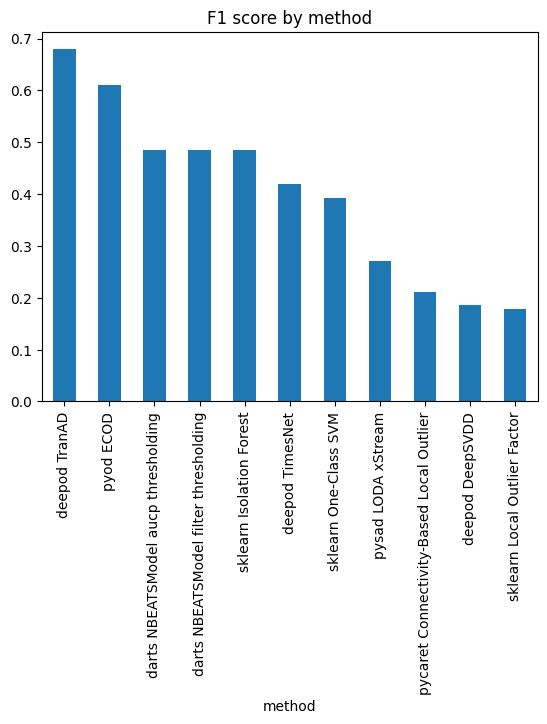

In [8]:
# Barplot of the F1 scores by method to compare the performance of the different methods
results_df.sort_values(by="F1", ascending=False)["F1"].plot(kind="bar", title="F1 score by method")
